# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
# Define Imperial units as we requires Max Temperature in Fahrenheit and Wind Speed in mph
units = "imperial"

# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Query url with units, api key and city name as parameter
query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

# Define lists to save JSON response
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
city_id = []
date = []

# Define counters to print processing logs
record_count = 1
set_count = 1

# Setting up For loop to make successive API calls and print processing log
# Since only 60 API calls can be made per min, we are creating sets of 50 cities and iterating through them
# Use time.sleep method to keep intervals between each API call
# Use Try Except loop to print cities whose response is not available and we might get potential error
# Append lists with JSON response

print("Beginning Data Retrieval\n"
      "------------------------------")

for i, city in enumerate(cities):
    if (i%50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    try:
        response = requests.get(query_url).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        city_id.append(response["id"])
        date.append(response["dt"])
        time.sleep(0.05)
        
    except KeyError:
        print("City not found. Skipping...")
        pass

print("------------------------------\n"
      "Data Retrieval Complete\n"
      "------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | souillac
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | ballina
Processing Record 5 of Set 1 | mbaiki
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | mazatlan
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | atar
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | abu dhabi
Processing Record 16 of Set 1 | nouadhibou
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | portland
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | benghazi
Processing Record 21 of Set 1 | whithorn
Processing Record 22 of Set 1 | shenjiamen
Processing Record 23 of Set 1 | ushuaia
Processing Record 24

Processing Record 38 of Set 4 | luderitz
Processing Record 39 of Set 4 | santa catarina de tepehuanes
Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | pangnirtung
Processing Record 42 of Set 4 | riberalta
Processing Record 43 of Set 4 | richards bay
Processing Record 44 of Set 4 | dunedin
Processing Record 45 of Set 4 | abu samrah
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | belmonte
Processing Record 48 of Set 4 | myitkyina
Processing Record 49 of Set 4 | tasiilaq
Processing Record 50 of Set 4 | meulaboh
Processing Record 1 of Set 5 | rawson
Processing Record 2 of Set 5 | nicoya
Processing Record 3 of Set 5 | acapulco
Processing Record 4 of Set 5 | susanville
Processing Record 5 of Set 5 | mount gambier
Processing Record 6 of Set 5 | taloqan
Processing Record 7 of Set 5 | mehamn
Processing Record 8 of Set 5 | phan rang
City not found. Skipping...
Processing Record 9 of Set 5 | oranjemund
Processing Record 10 of Set 5 | benguela
Processi

Processing Record 27 of Set 8 | huarmey
Processing Record 28 of Set 8 | talara
Processing Record 29 of Set 8 | wembley
Processing Record 30 of Set 8 | palauig
Processing Record 31 of Set 8 | tunceli
Processing Record 32 of Set 8 | san cristobal
Processing Record 33 of Set 8 | harper
Processing Record 34 of Set 8 | morondava
Processing Record 35 of Set 8 | gazanjyk
Processing Record 36 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 37 of Set 8 | gazni
City not found. Skipping...
Processing Record 38 of Set 8 | port lincoln
Processing Record 39 of Set 8 | longlac
City not found. Skipping...
Processing Record 40 of Set 8 | bentiu
Processing Record 41 of Set 8 | mogadishu
Processing Record 42 of Set 8 | comodoro rivadavia
Processing Record 43 of Set 8 | san luis
Processing Record 44 of Set 8 | barzas
Processing Record 45 of Set 8 | fairbanks
Processing Record 46 of Set 8 | gat
Processing Record 47 of Set 8 | lata
Processing Record 48 of Set 8 | naze
Processing Record 4

Processing Record 15 of Set 12 | ostersund
Processing Record 16 of Set 12 | san pedro
Processing Record 17 of Set 12 | yar-sale
Processing Record 18 of Set 12 | juifang
City not found. Skipping...
Processing Record 19 of Set 12 | flinders
Processing Record 20 of Set 12 | dulce grande
Processing Record 21 of Set 12 | makung
City not found. Skipping...
Processing Record 22 of Set 12 | havelock
Processing Record 23 of Set 12 | yarkovo
Processing Record 24 of Set 12 | sungaipenuh
Processing Record 25 of Set 12 | alice springs
Processing Record 26 of Set 12 | vestmanna
Processing Record 27 of Set 12 | selenduma
Processing Record 28 of Set 12 | jieshou
Processing Record 29 of Set 12 | mauswagon
City not found. Skipping...
Processing Record 30 of Set 12 | bajo baudo
City not found. Skipping...
Processing Record 31 of Set 12 | khonuu
City not found. Skipping...
Processing Record 32 of Set 12 | wheeling
Processing Record 33 of Set 12 | solnechnyy
Processing Record 34 of Set 12 | shagonar
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
# Create Dataframe from JSON response
cities_df = pd.DataFrame({"City": city_name,
                               "Lat": lat, 
                               "Lng": lon, 
                               "Max Temp": max_temp, 
                               "Humidity": humidity, 
                               "Cloudiness": cloudiness, 
                               "Wind Speed": wind_speed, 
                               "Country": country,
                               "Date": date})
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,82.38,68,1,1.01,US,1636583282
1,Souillac,-20.5167,57.5167,75.58,73,75,8.05,MU,1636583429
2,Lebu,-37.6167,-73.6500,55.74,80,88,9.66,CL,1636583430
3,Ballina,-28.8667,153.5667,78.98,83,100,10.36,AU,1636583430
4,Mbaïki,3.8678,17.9892,71.06,98,97,1.83,CF,1636583430
...,...,...,...,...,...,...,...,...,...
563,Mossamedes,-15.1961,12.1522,71.56,72,65,6.40,AO,1636583647
564,Biryusinsk,55.9634,97.8235,39.47,40,98,12.77,RU,1636583537
565,Lanzhou,36.0564,103.7922,22.28,37,43,0.69,CN,1636583647
566,Bubaque,11.2833,-15.8333,83.59,67,88,12.55,GW,1636583648


In [40]:
# Save Dataframe as CSV file for future reference
cities_df.to_csv("output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
cities_weather_stats = cities_df.describe()
cities_weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.229902,18.964126,56.999032,72.985915,60.964789,8.037729,1.636584e+09
std,33.174105,91.564217,23.753377,18.959340,37.604769,5.710891,8.725779e+01
min,-54.800000,-179.166700,-18.800000,11.000000,0.000000,0.000000,1.636583e+09
25%,-6.896800,-65.054450,40.585000,64.000000,20.000000,3.775000,1.636583e+09
50%,22.728800,26.758350,64.065000,75.500000,75.000000,6.720000,1.636584e+09
75%,46.518350,100.780225,75.970000,87.000000,97.000000,11.160000,1.636584e+09
max,78.218600,179.316700,89.200000,100.000000,100.000000,29.930000,1.636584e+09


In [43]:
#  Get the indices of cities that have humidity over 100%.
humidity_outliers = cities_df.loc[cities_df["Humidity"] > 100].index
humidity_outliers

Int64Index([], dtype='int64')

In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(humidity_outliers, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,82.38,68,1,1.01,US,1636583282
1,Souillac,-20.5167,57.5167,75.58,73,75,8.05,MU,1636583429
2,Lebu,-37.6167,-73.6500,55.74,80,88,9.66,CL,1636583430
3,Ballina,-28.8667,153.5667,78.98,83,100,10.36,AU,1636583430
4,Mbaïki,3.8678,17.9892,71.06,98,97,1.83,CF,1636583430
...,...,...,...,...,...,...,...,...,...
563,Mossamedes,-15.1961,12.1522,71.56,72,65,6.40,AO,1636583647
564,Biryusinsk,55.9634,97.8235,39.47,40,98,12.77,RU,1636583537
565,Lanzhou,36.0564,103.7922,22.28,37,43,0.69,CN,1636583647
566,Bubaque,11.2833,-15.8333,83.59,67,88,12.55,GW,1636583648


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [65]:
# Define function for Scatter Plots

def scatter_plot (y_axis_col, ylabel_name):
    x_axis = clean_city_data["Lat"]
    y_axis = clean_city_data[y_axis_col]

    plt.scatter(x_axis, y_axis, edgecolors='black')

    # Labels and Titles for the plot
    # using date.today to display current date
    plt.xlabel("Latitude")
    plt.ylabel(ylabel_name)
    plt.title(f"City Latitude vs. {y_axis_col} ({datetime.date.today().strftime('%d/%m/%Y')})")

    # Plot gridlines
    plt.grid(True)

    # Display plot
    plt.show()

## Latitude vs. Temperature Plot

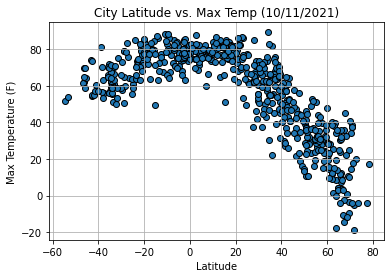

In [66]:
scatter_plot("Max Temp", "Max Temperature (F)")

In [ ]:
# In this scatter plot, it is shown that the maximum temperature will decrease as we move far away from the equator.

## Latitude vs. Humidity Plot

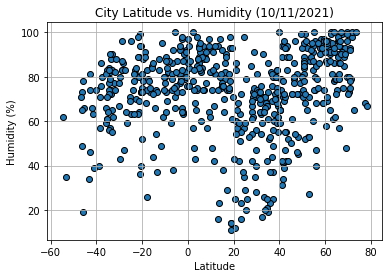

In [83]:
scatter_plot("Humidity", "Humidity (%)")

In [ ]:
# In this scatter plot, humidity and latitude don't have any specific correlation.

## Latitude vs. Cloudiness Plot

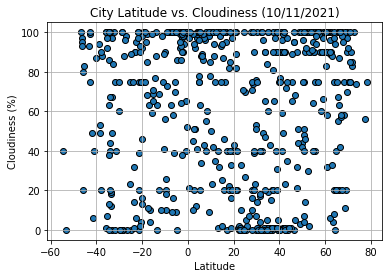

In [84]:
scatter_plot("Cloudiness", "Cloudiness (%)")

In [ ]:
# In this scatter plot, the cloudiness data is scattered throughout with some latitudes having minimum value (0%) and some having maximum value (100%) with no correlation.

## Latitude vs. Wind Speed Plot

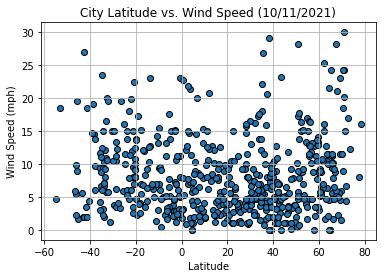

In [86]:
scatter_plot("Wind Speed", "Wind Speed (mph)")

## Linear Regression

In [67]:
# Dataframe for cities in Northern Hemisphere (greater than or equal to 0 degrees latitude)

northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,82.38,68,1,1.01,US,1636583282
4,Mbaïki,3.8678,17.9892,71.06,98,97,1.83,CF,1636583430
6,Mazatlán,23.2167,-106.4167,85.96,72,1,5.01,MX,1636583431
8,Atar,20.5169,-13.0499,79.38,25,100,9.89,MR,1636583432
14,Abu Dhabi,24.4667,54.3667,77.02,57,0,1.14,AE,1636583434


In [75]:
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Souillac,-20.5167,57.5167,75.58,73,75,8.05,MU,1636583429
2,Lebu,-37.6167,-73.6500,55.74,80,88,9.66,CL,1636583430
3,Ballina,-28.8667,153.5667,78.98,83,100,10.36,AU,1636583430
5,Hobart,-42.8794,147.3294,54.27,81,75,1.99,AU,1636583317
7,Vaini,-21.2000,-175.2000,80.76,89,75,8.05,TO,1636583431


In [72]:
def linear_regression(x_axis_h, y_axis_h, y_labelname_h, a, b, hemisphere):
    plt.scatter(x_axis_h, y_axis_h)

    # Labels and Titles for the plot
    # using date.today to display current date
    plt.xlabel("Latitude")
    plt.ylabel(y_labelname_h)
    plt.title(f" {hemisphere} Hemisphere - {y_labelname_h} vs. Latitude Linear Regression\n" 
              f"({datetime.date.today().strftime('%d/%m/%Y')})")

    (slope, intercept, r_value, p_value, std_err) = linregress(x_axis_h,y_axis_h)

    # Line equation
    regress_value = slope*x_axis_h + intercept

    # Line equation to print on the scatter plot
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Line plot for regerssion line
    plt.plot(x_axis_h,regress_value, "r-")

    # Display regression line
    plt.annotate(line_eq,(a,b), fontsize=14, color="red")
    
     # Calculate r-value
    print(f"The r-value is: {round(r_value,2)}")
    
    # Display plot
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.87


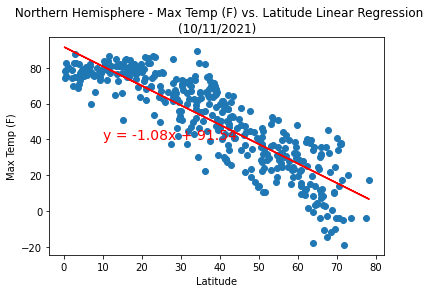

In [73]:
linear_regression(northern_hemisphere["Lat"], 
                  northern_hemisphere["Max Temp"], 
                  "Max Temp (F)", 10, 40, "Northern")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.62


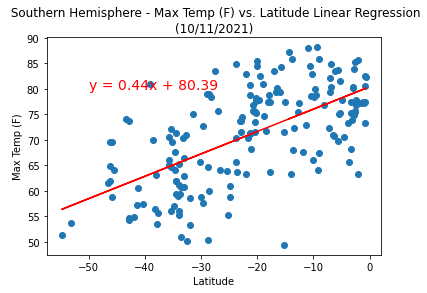

In [76]:
linear_regression(southern_hemisphere["Lat"], 
                  southern_hemisphere["Max Temp"], 
                  "Max Temp (F)", -50, 80, "Southern")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21


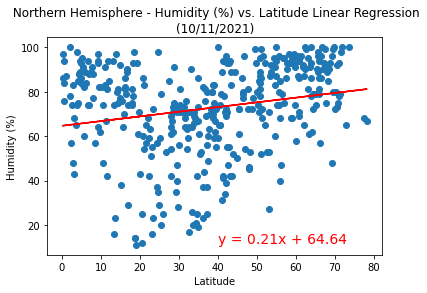

In [77]:
linear_regression(northern_hemisphere["Lat"], 
                  northern_hemisphere["Humidity"], 
                  "Humidity (%)", 40, 12, "Northern")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.32


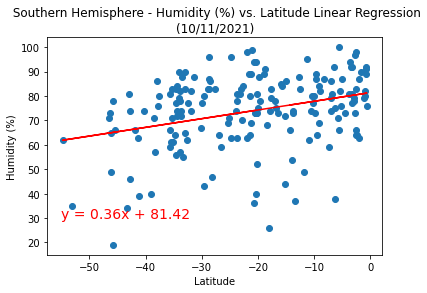

In [78]:
linear_regression(southern_hemisphere["Lat"], 
                  southern_hemisphere["Humidity"], 
                  "Humidity (%)", -55, 30, "Southern")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12


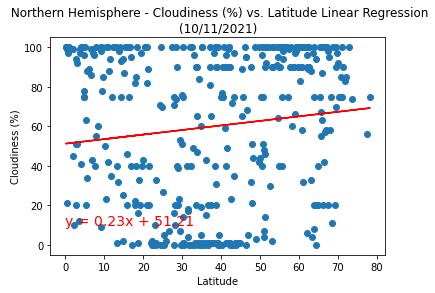

In [79]:
linear_regression(northern_hemisphere["Lat"], 
                  northern_hemisphere["Cloudiness"], 
                  "Cloudiness (%)", 0, 10, "Northern")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15


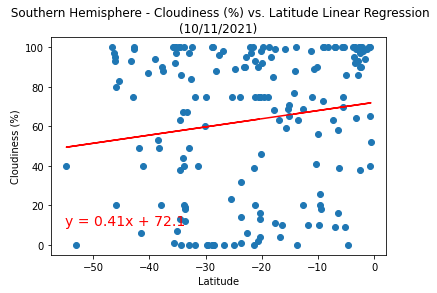

In [80]:
linear_regression(southern_hemisphere["Lat"], 
                  southern_hemisphere["Cloudiness"], 
                  "Cloudiness (%)", -55, 10, "Southern")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.16


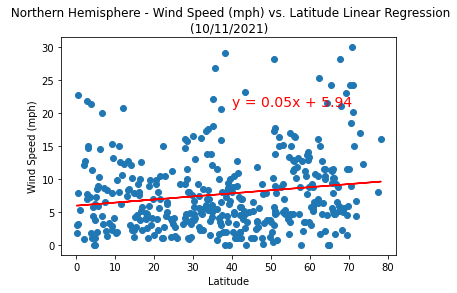

In [81]:
linear_regression(northern_hemisphere["Lat"], 
                  northern_hemisphere["Wind Speed"], 
                  "Wind Speed (mph)", 40, 21, "Northern")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.16


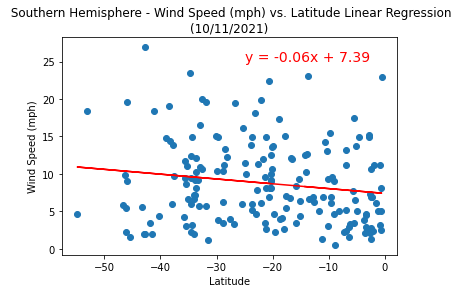

In [82]:
linear_regression(southern_hemisphere["Lat"], 
                  southern_hemisphere["Wind Speed"], 
                  "Wind Speed (mph)", -25, 25, "Southern")